In [ ]:
%matplotlib inline


# Digits Classification Exercise


A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

In [7]:
from sklearn import datasets, neighbors, linear_model

In [8]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [23]:
print("Features:",
      digits.data.shape, 
      digits.data.dtype, 
      "\n  Target:",
      digits.target.shape, 
      digits.target.dtype)

Features: (1797, 64) float64 
  Target: (1797,) int64


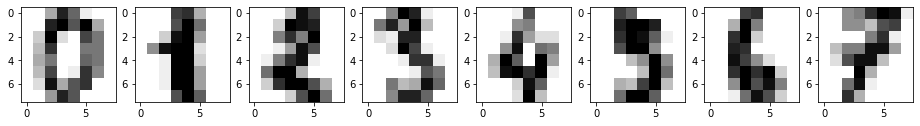

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 8, figsize=(16, 2))
for n in range(8):
    ax[n].imshow(digits.images[n], cmap=plt.cm.gray_r)
plt.show()

In [9]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

In [10]:
n_samples

1797

In [11]:
X_digits.shape

(1797, 64)

In [12]:
X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

In [13]:
X_train.shape

(1617, 64)

In [14]:
X_test.shape

(180, 64)

In [15]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000000000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


### **Test** with Sklearn train test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)


In [26]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000000000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.993266
LogisticRegression score: 0.973064


## Quick comparison of many classifiers in scikit-learn

> **"The first 90 percent of the code accounts for the first 90 percent of the development time. The remaining 10 percent of the code accounts for the other 90 percent of the development time."** –Tom Cargill, Bell Labs

Having done the 90% of our work that was needed for data cleanup, the next 90% can be spent on model selection. Better hyperparameters than those chosen below (mostly defaults) are likely to identify better fits. Moreover, the few classifiers listed are by no means all of those in scikit-learn.

This code is mostly based on the Scikit-learn [Classifier Comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

> Code source: Gaël Varoquaux & Andreas Müller<br/>
> Modified for documentation by Jaques Grobler<br/>
> License: BSD 3 clause

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

In [28]:
from time import time
nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.089 | time = 0.001s/0.001s
KNN(3)         | score = 0.990 | time = 0.006s/0.102s
RBF SVM        | score = 0.094 | time = 0.243s/0.061s
Decision Tree  | score = 0.837 | time = 0.010s/0.000s
Random Forest  | score = 0.923 | time = 0.017s/0.002s
Neural Net     | score = 0.966 | time = 1.798s/0.003s
AdaBoost       | score = 0.342 | time = 0.217s/0.017s
Naive Bayes    | score = 0.816 | time = 0.002s/0.002s
QDA            | score = 0.843 | time = 0.025s/0.004s
Linear SVC     | score = 0.938 | time = 0.140s/0.001s


/home/enigma/Projects/ML_with_scikit_learn/sklearn/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enigma/Projects/ML_with_scikit_learn/sklearn/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Classifier boundary comparison

On of the main tradeoffs among classifiers (and also among regressors) is between complexity and generalization.  For example, `LinearRegression` and `LogisticRegression` are very simple models that cannot fit complicated relationships. On the other hand, it is hard to overfit a LinearRegression.

In contrast, `KNeighborsClassifier` is not very general.  At the extreme, with one neighbor, the model essentially just memorizes the data.  On the other hand, for overly large `n_neighbors`, the model will tend to only predict the most commonly occurring label.  That said, there are many datasets for which K nearest neighbor is an excellent choice.

The below code is taken directly from the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).  It is a nice way to explore and visually summarize the different decision boundaries that various classifiers product.

/home/enigma/Projects/ML_with_scikit_learn/sklearn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/enigma/Projects/ML_with_scikit_learn/sklearn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/enigma/Projects/ML_with_scikit_learn/sklearn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


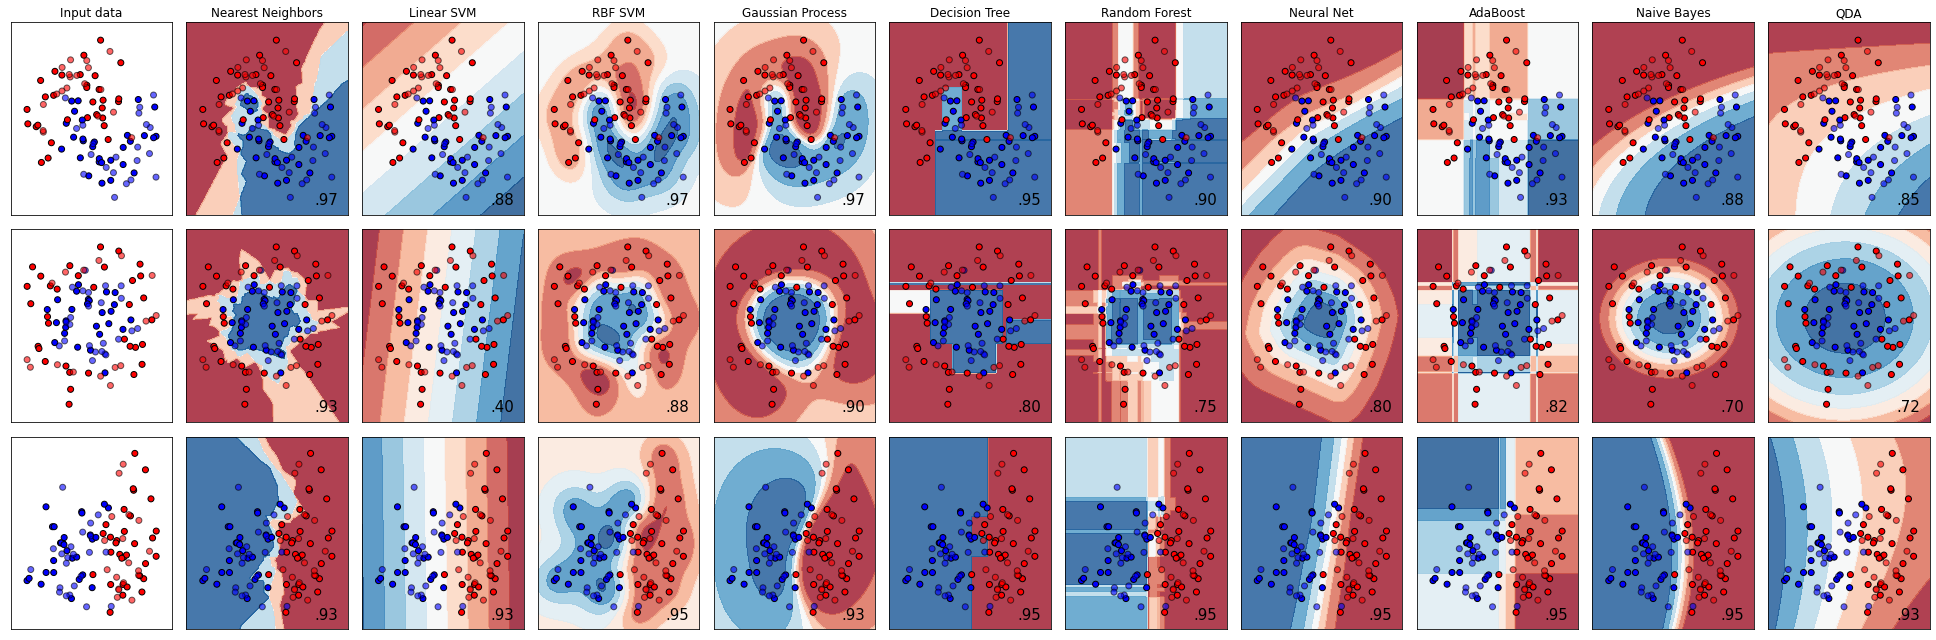

In [29]:
%run src/classifier_comparison.py